In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#read data files
X=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
X.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test['Survived']=np.nan
full=pd.concat([X,test])

Number of Persons:  1309
dataset variables:  12
--------------------
dateset columns: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------
data-type of each column: 

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
--------------------
missing rows in each column: 

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64
--------------------
Missing vaules %age vise:

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.0000

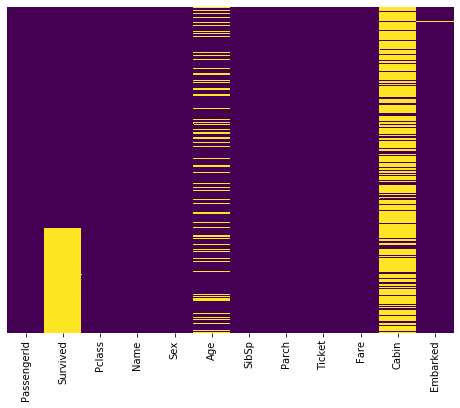

In [6]:

def data_inv(df):
    print('Number of Persons: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*20)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*20)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*20)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
    print('-'*20)
    print('Missing vaules %age vise:\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('-'*20)
    print('Pictorial Representation:')
    plt.figure(figsize=(8,6))
    sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
    plt.show()   
data_inv(full)#function call

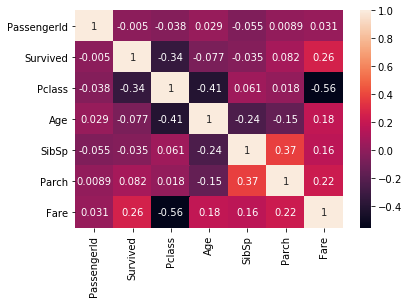

In [7]:
sns.heatmap(full.corr(), annot = True)

In [8]:
#fillna
from statistics import mode
full['Embarked']=full['Embarked'].fillna(mode(full['Embarked'])) 
full['Fare'].fillna(full['Fare'].dropna().median(),inplace=True)
full['Age'] = full.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [9]:
full['Fam']=full['Parch']+full['SibSp']

In [10]:
full=pd.get_dummies(data=full,columns=['Sex','Embarked'],drop_first=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Fam          1309 non-null   int64  
 11  Sex_male     1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int64(5), object(3), uint8(3)
memory usage: 126.6+ KB


In [11]:
full=full.drop(['Cabin','Ticket','Name','Parch','SibSp'],axis=1)


In [12]:
#Data Standardization 
preprocessing.StandardScaler().fit(full).transform(full.astype(float))

array([[-1.73072813, -0.78927234,  0.84191642, ...,  0.74349692,
        -0.32204029,  0.65501092],
       [-1.72808175,  1.2669898 , -1.54609786, ..., -1.34499549,
        -0.32204029, -1.52669211],
       [-1.72543538,  1.2669898 ,  0.84191642, ..., -1.34499549,
        -0.32204029,  0.65501092],
       ...,
       [ 1.72543538,         nan,  0.84191642, ...,  0.74349692,
        -0.32204029,  0.65501092],
       [ 1.72808175,         nan,  0.84191642, ...,  0.74349692,
        -0.32204029,  0.65501092],
       [ 1.73072813,         nan,  0.84191642, ...,  0.74349692,
        -0.32204029, -1.52669211]])

In [13]:
test = full[full['Survived'].isna()].drop(['Survived'], axis = 1)
train = full[full['Survived'].notna()]
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Fam          891 non-null    int64  
 6   Sex_male     891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 51.3 KB


In [14]:



X=train[['Age','Fare','Fam','Pclass','Sex_male','Embarked_Q' ,'Embarked_S']]

y=train[['Survived']].astype(np.int8)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [16]:
Scores=[]
hidden_layer_sizes=[]


for cols in range(50,55):
    for rows in range(3,5):
        hidden_layer=(cols,rows)

        from sklearn.neural_network import MLPClassifier
        MLPClassifierModel = MLPClassifier(activation='logistic', # can be also identity , tanh,logistic , relu
                                           solver='lbfgs',  # can be lbfgs also sgd , adam
                                           alpha=0.1 ,hidden_layer_sizes=hidden_layer,random_state=33)
        MLPClassifierModel.fit(X_train, y_train)

        MLPClassifier_y_pred = MLPClassifierModel.predict(X_test)
        Scores.append(MLPClassifierModel.score(X_test, y_test))
        hidden_layer_sizes.append(str(hidden_layer))
        




/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/sit

In [17]:
models = pd.DataFrame({
    'hidden_layer': hidden_layer_sizes,
    'Score': Scores})
models.sort_values(by='Score', ascending=False )




,hidden_layer,Score
4,"(52, 3)",0.865471
3,"(51, 4)",0.843049
0,"(50, 3)",0.834081
7,"(53, 4)",0.829596
8,"(54, 3)",0.829596
2,"(51, 3)",0.825112
1,"(50, 4)",0.820628
5,"(52, 4)",0.820628
6,"(53, 3)",0.820628
9,"(54, 4)",0.820628


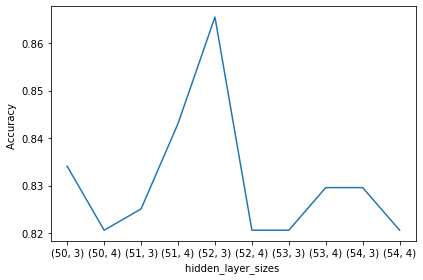

In [18]:
 
plt.plot(hidden_layer_sizes,Scores)
plt.ylabel('Accuracy ')
plt.xlabel('hidden_layer_sizes ')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic', # can be also identity , tanh,logistic , relu
                                   solver='lbfgs',  # can be lbfgs also sgd , adam
                                   learning_rate='adaptive', # can be constant also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.1 ,hidden_layer_sizes=(52, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

MLPClassifier_y_pred = MLPClassifierModel.predict(X_test)
MLPClassifierModel.fit(X, y)
MLPClassifier_y_pred= MLPClassifierModel.predict(test[['Age','Fare','Fam','Pclass','Sex_male','Embarked_Q' ,'Embarked_S']])

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/sit

In [20]:
Id=test['PassengerId']
sub_df=pd.DataFrame({'PassengerId':Id,'Survived':MLPClassifier_y_pred})
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
